In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import json

In [20]:
def plot_query_median():
    exp_dir = "/gscratch/balazinska/enhaoz/complex_event_video/src/quivr/outputs/synthetic_trajectories_rare-sampling_rate_4"

    fig, axs = plt.subplots(1, 2, figsize = (12, 3))

    # Quivr without kleene
    try:
        count_failed = 0
        quivr_f1 = []
        quivr_runtime = []
        dir_name = os.path.join(exp_dir, 
                               "stats", 
                               "quivr_original_no_kleene/nip_2-nin_10-npred_5-n_nontrivial_None-n_trivial_None-depth_3-max_d_1-thread_1-lru_None"
                                )
        for filename in os.listdir(dir_name):
            with open(os.path.join(dir_name, filename), "r") as f:
                quivr_stats = json.load(f)
            quivr_runtime_per_run = quivr_stats["runtime"]
            quivr_f1_per_run = quivr_stats["score"]
            if sum(quivr_f1_per_run) / len(quivr_f1_per_run) == -1:
                count_failed += 1
                continue
            quivr_f1.append(quivr_f1_per_run)
            quivr_runtime.append(quivr_runtime_per_run)
        
        print("quivr (no kleene) failed: {}".format(count_failed))
        quivr_x = list(range(12, 51))
        quivr_f1 = np.array(quivr_f1)
        quivr_f1_25 = np.percentile(quivr_f1, 25, axis=0)
        quivr_f1_50 = np.percentile(quivr_f1, 50, axis=0)
        quivr_f1_75 = np.percentile(quivr_f1, 75, axis=0)
        quivr_runtime = np.array(quivr_runtime)
        quivr_runtime_25 = np.percentile(quivr_runtime, 25, axis=0)
        quivr_runtime_50 = np.percentile(quivr_runtime, 50, axis=0)
        quivr_runtime_75 = np.percentile(quivr_runtime, 75, axis=0)
        axs[0].plot(quivr_x, quivr_f1_50, marker='s', markersize=1, label="quivr (no kleene)", color='tab:blue')
        axs[0].fill_between(quivr_x, quivr_f1_25, quivr_f1_75, facecolor='tab:blue', alpha=0.3)
        axs[1].plot(quivr_x, quivr_runtime_50, marker='s', markersize=1, label="quivr (no kleene)", color='tab:blue')
        axs[1].fill_between(quivr_x, quivr_runtime_25, quivr_runtime_75, facecolor='tab:blue', alpha=0.3)
    except:
        pass
    
    # VOCAL
    try:
        f1 = []
        runtime = []
        dir_name = os.path.join(exp_dir, 
                               "stats", 
                               "vocal_postgres-topk"
                                )
        for filename in os.listdir(dir_name):
            with open(os.path.join(dir_name, filename), "r") as f:
                stats = json.load(f)
            runtime_per_run = stats["runtime"]
            f1_per_run = stats["score"]        
            f1.extend(f1_per_run)
            runtime.extend(runtime_per_run)
        f1 = np.array(f1)
        f1[f1 == -1] = np.nan
        runtime = np.array(runtime)
        runtime[runtime == -1] = np.nan
        x = list(range(12, 21)) + list(range(25, 31, 5)) + [50]
        f1_25 = np.nanpercentile(f1, 25, axis=0)
        f1_50 = np.nanpercentile(f1, 50, axis=0)
        f1_75 = np.nanpercentile(f1, 75, axis=0)
        runtime_25 = np.nanpercentile(runtime, 25, axis=0)
        runtime_50 = np.nanpercentile(runtime, 50, axis=0)
        runtime_75 = np.nanpercentile(runtime, 75, axis=0)
        axs[0].plot(x, f1_50, marker='s', markersize=1, label="vocal", color='tab:green')
        axs[0].fill_between(x, f1_25, f1_75, facecolor='tab:green', alpha=0.3)
        axs[1].plot(x, runtime_50, marker='s', markersize=1, label="vocal", color='tab:green')
        axs[1].fill_between(x, runtime_25, runtime_75, facecolor='tab:green', alpha=0.3)
    except Exception as err:
        print(err)
        pass
    
    # VOCAL (no duration)
    try:
        f1 = []
        runtime = []
        dir_name = os.path.join("/gscratch/balazinska/enhaoz/complex_event_video/src/quivr/outputs/synthetic_trajectories_rare-max_d_1-sampling_rate_4", 
                               "stats-test", 
                               "vocal_postgres-topk"
                                )
        for filename in os.listdir(dir_name):
            with open(os.path.join(dir_name, filename), "r") as f:
                stats = json.load(f)
            runtime_per_run = stats["runtime"]
            f1_per_run = stats["score"]        
            f1.extend(f1_per_run)
            runtime.extend(runtime_per_run)                

        f1 = np.array(f1)
        f1[f1 == -1] = np.nan
        runtime = np.array(runtime)
        runtime[runtime == -1] = np.nan
        x = list(range(12, 21)) + list(range(25, 31, 5)) + [50]
        f1_25 = np.nanpercentile(f1, 25, axis=0)
        f1_50 = np.nanpercentile(f1, 50, axis=0)
        f1_75 = np.nanpercentile(f1, 75, axis=0)
        runtime_25 = np.nanpercentile(runtime, 25, axis=0)
        runtime_50 = np.nanpercentile(runtime, 50, axis=0)
        runtime_75 = np.nanpercentile(runtime, 75, axis=0)
        axs[0].plot(x, f1_50, marker='s', markersize=1, label="vocal (no duration)", color='tab:pink')
        axs[0].fill_between(x, f1_25, f1_75, facecolor='tab:pink', alpha=0.3)
        axs[1].plot(x, runtime_50, marker='s', markersize=1, label="vocal (no duration)", color='tab:pink')
        axs[1].fill_between(x, runtime_25, runtime_75, facecolor='tab:pink', alpha=0.3)
    except Exception as err:
        print(err)
        pass

    axs[0].set(xlabel="# examples", ylabel="Test F1 score")
    axs[0].legend(prop={"size":10}, loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=2)
    axs[0].set_ylim(bottom=0, top=1)
    axs[1].set(xlabel="# examples", ylabel="Runtime (s)")
    axs[1].legend(prop={"size":10}, loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=2)
    # axs[1].set_ylim(bottom=0)
    axs[1].set_ylim(bottom=1, top=4000)
    axs[1].set_yscale('log')

    plt.subplots_adjust(bottom=0.15)
#     plt.savefig("figures/main/{}_median.png".format(query_str), bbox_inches='tight')

([<matplotlib.axis.XTick at 0x7f62b5934040>,
 [Text(1, 0, 'vocal_postgres-topk-1'),
  Text(2, 0, 'vocal_postgres-topk-2'),
  Text(3, 0, 'vocal_postgres-topk-3'),
  Text(4, 0, 'vocal_postgres-topk-4'),
  Text(5, 0, 'vocal_postgres_most_likely_positive-topk-3'),
  Text(6, 0, 'vocal_postgres_most_likely_positive-topk-4')])

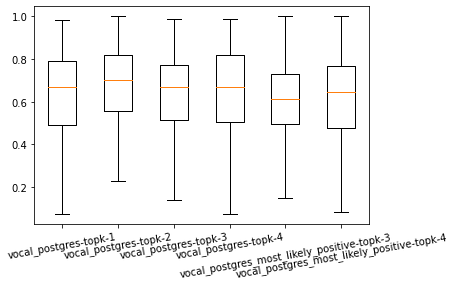

In [5]:
methods = ["vocal_postgres-topk-1", "vocal_postgres-topk-2", "vocal_postgres-topk-3", "vocal_postgres-topk-4", "vocal_postgres_most_likely_positive-topk-3", "vocal_postgres_most_likely_positive-topk-4"]
dir_name = "/gscratch/balazinska/enhaoz/complex_event_video/src/quivr/outputs/synthetic_trajectories_rare-sampling_rate_4-test_query_expansion_strategies/stats"

columns_median = []
columns_random = []
for method in methods: 
    f1_median = []
    f1_random = []
    for filename in os.listdir(os.path.join(dir_name, method)):
        with open(os.path.join(dir_name, method, filename), "r") as f:
            stats = json.load(f)
        f1_median_per_run = [run[0] for run in stats["score_median"]]
        f1_random_per_run = [run[0] for run in stats["score_random"]]
        f1_median.extend(f1_median_per_run)
        f1_random.extend(f1_random_per_run)
    f1_median = np.array(f1_median)
    f1_random = np.array(f1_random)
    f1_median[f1_median == -1] = np.nan 
    f1_random[f1_random == -1] = np.nan 
    f1_median = f1_median[~np.isnan(f1_median)]
    f1_random = f1_random[~np.isnan(f1_random)]
    columns_median.append(f1_median)
    columns_random.append(f1_random)
fig, ax = plt.subplots()
ax.boxplot(columns_median, showfliers=False)
plt.xticks(list(range(1, len(methods)+1)), methods, rotation=10)

([<matplotlib.axis.XTick at 0x7f62b5a1abe0>,
 [Text(1, 0, 'vocal_postgres-topk-1'),
  Text(2, 0, 'vocal_postgres-topk-2'),
  Text(3, 0, 'vocal_postgres-topk-3')])

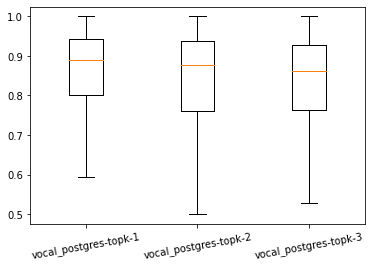

In [4]:
methods = ["vocal_postgres-topk-1", "vocal_postgres-topk-2", "vocal_postgres-topk-3"]
dir_name = "/gscratch/balazinska/enhaoz/complex_event_video/src/quivr/outputs/synthetic_trajectories_rare-sampling_rate_4-test_query_expansion_strategies/stats-budget_30"

columns_median = []
columns_random = []
for method in methods: 
    f1_median = []
    f1_random = []
    for filename in os.listdir(os.path.join(dir_name, method)):
        with open(os.path.join(dir_name, method, filename), "r") as f:
            stats = json.load(f)
        f1_median_per_run = [run[0] for run in stats["score_median"]]
        f1_random_per_run = [run[0] for run in stats["score_random"]]
        f1_median.extend(f1_median_per_run)
        f1_random.extend(f1_random_per_run)
    f1_median = np.array(f1_median)
    f1_random = np.array(f1_random)
    f1_median[f1_median == -1] = np.nan 
    f1_random[f1_random == -1] = np.nan 
    f1_median = f1_median[~np.isnan(f1_median)]
    f1_random = f1_random[~np.isnan(f1_random)]
    columns_median.append(f1_median)
    columns_random.append(f1_random)
fig, ax = plt.subplots()
ax.boxplot(columns_median, showfliers=False)
plt.xticks(list(range(1, len(methods)+1)), methods, rotation=10)